### Objective: I am interested in understanding the rakings of the competition.

How did people progress? 

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from os import listdir, getcwd
from os.path import split, join
from sklearn.linear_model import LinearRegression


In [11]:
path = join( split(getcwd())[0], 'data_local')
fpath = join(path, 'melbourne-university-seizure-prediction_public_leaderboard.csv')

In [13]:
data =pd.read_csv(fpath)

In [15]:
data['SubmissionDate'] = pd.to_datetime(data['SubmissionDate'])

In [66]:
teams = data.groupby('TeamName')
max_score= pd.DataFrame(teams.apply(lambda x: x.Score.max()), columns = ['MaxScore'])

submissions = pd.DataFrame(data.TeamName.value_counts())
submissions.columns = ['NumberSubmissions']
delta =pd.DataFrame(teams.apply(lambda x: x.Score.max()- x.Score.min()), columns = ['ChangeInScore'])



In [82]:
stats = pd.concat([max_score, submissions, delta], axis = 1)
stats.sort_values('MaxScore', inplace = True, ascending = False)
stats['Log(Submissions)'] = np.log2(stats.NumberSubmissions)

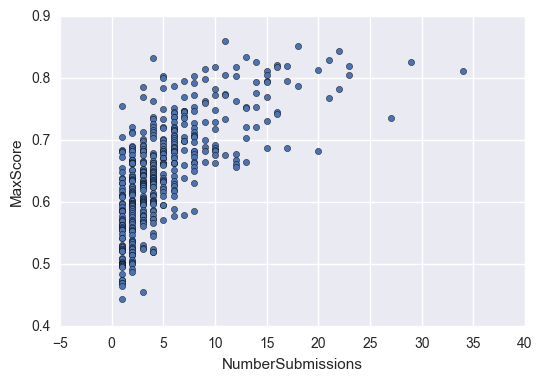

In [83]:
stats.plot.scatter(y = 'MaxScore', x='NumberSubmissions')


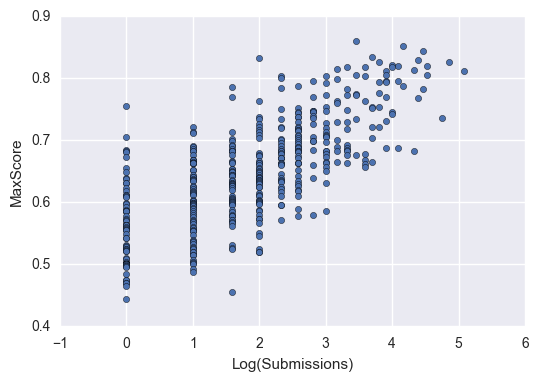

In [84]:
stats.plot.scatter(y = 'MaxScore', x='Log(Submissions)')

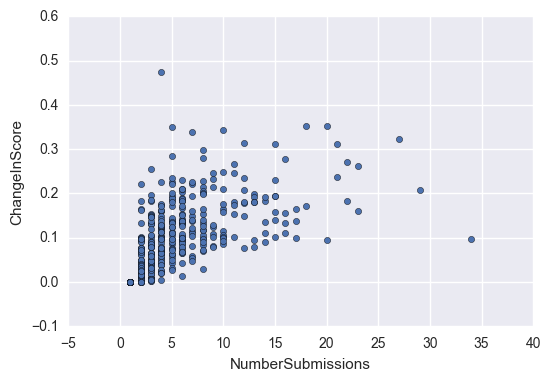

In [75]:
stats.plot.scatter(x = 'NumberSubmissions', y = 'ChangeInScore')

In [78]:
data = np.log(stats.NumberSubmissions)

DataSpring                       2.397895
Not-so-random-anymore            2.890372
Komaki                           3.091042
Ehsan                            2.564949
fugusuki                         1.386294
Mehdi Pedram                     3.044522
Joseph Chui                      3.367296
LabGOL                           2.639057
rmldj                            2.772589
Kyle                             3.135494
Claudia                          2.833213
krischen                         2.484907
Alaa-Sean (UWaterloo)            2.302585
Medrr                            2.772589
GarethJones                      2.197225
nullset                          2.995732
RNG (Polymtl)                    2.708050
Mickey                           3.526361
Excited! +1s                     3.135494
tralala boum boum pou�t pou�t    2.397895
deepfit                          2.708050
michaln                          2.079442
CMC                              1.609438
Chipicito+SolverWorld            2